In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

In [4]:
df = pd.read_csv('data.csv',sep=';')
df.rename(columns={'Daytime/evening attendance\t':'Daytime/evening attendance'},inplace=True)
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [5]:
#How the unemployment rate affects the students between differents marital status
unemp_by_role_marital = df.pivot_table(columns='Marital status',index='Target',values='Unemployment rate',aggfunc='mean')
unemp_by_role_marital = unemp_by_role_marital.round(2)
#unemp_by_role_marital.to_csv('unemp.csv',sep=',')
unemp_by_role_marital

Marital status,1,2,3,4,5,6
Target,,,,,,
Dropout,11.66,11.36,10.8,11.41,11.79,11.0
Enrolled,11.32,10.70,10.8,11.48,9.97,10.8
Graduate,11.67,11.19,9.4,11.66,12.21,13.9


In [6]:
df['GDP'].corr(df['Admission grade'])

-0.019519481896555675

In [7]:
df['Course'].replace({
    33: 'Biofuel Production Technologies',
    171: 'Animation and Multimedia Design',
    8014: 'Social Service (evening attendance)',
    9003: 'Agronomy',
    9070: 'Communication Design',
    9085: 'Veterinary Nursing',
    9119: 'Informatics Engineering',
    9130: 'Equinculture',
    9147: 'Management',
    9238: 'Social Service',
    9254: 'Tourism',
    9500: 'Nursing',
    9556: 'Oral Hygiene',
    9670: 'Advertising and Marketing Management',
    9773: 'Journalism and Communication',
    9853: 'Basic Education',
    9991: 'Management (evening attendance)'
},inplace=True)

df['Gender'].replace({
    1:'male',
    0:'female'
},inplace=True)

df['Nacionality'].replace({
    1: 'Portuguese',
    2: 'German',
    6: 'Spanish',
    11: 'Italian',
    13: 'Dutch',
    14: 'English',
    17: 'Lithuanian',
    21: 'Angolan',
    22: 'Cape Verdean',
    24: 'Guinean',
    25: 'Mozambican',
    26: 'Santomean',
    32: 'Turkish',
    41: 'Brazilian',
    62: 'Romanian',
    100: 'Moldova (Republic of)',
    101: 'Mexican',
    103: 'Ukrainian',
    105: 'Russian',
    108: 'Cuban',
    109: 'Colombian'
},inplace=True)



In [8]:
Gender_per_course = df[['Gender','Course']].copy().groupby(by='Gender').value_counts()

Gender_per_course.to_csv('gender_per_course.csv',sep=',')

In [9]:
Gender_per_country = (df[['Gender','Nacionality']].groupby(by='Gender').value_counts(normalize=True) * 100).round(2)
male_count = Gender_per_country['male']
female_count = Gender_per_country['female']

male_count.to_csv('male_count_per_country.csv',sep=',')
female_count.to_csv('female_count_per_country.csv',sep=',')

In [10]:
Gender_per_role = df[['Gender','Target']].groupby(by='Gender').value_counts()
Gender_per_role.to_csv('gender_per_role.csv',sep=',')

In [11]:
Gender_per_special_needs = df[['Gender','Educational special needs','Course']].loc[df['Educational special needs'] == 1].groupby(by=['Gender']).value_counts()
Gender_per_special_needs.to_csv('special_needs_course.csv',sep=',')

In [15]:
# Gross domestic product per student role 
df['GDP'] = pd.qcut(df['GDP'],q=3)
GDP_per_role = df[['GDP','Target']].groupby(by='GDP').value_counts()
GDP_per_role.to_csv('GDP_per_role.csv')

In [17]:
GDP_per_course = df[['GDP','Course']].groupby(by='GDP').value_counts()
GDP_per_course.to_csv('GDP_per_course.csv')
GDP_per_course

GDP              Course                              
(-4.061, -0.92]  Nursing                                 330
                 Management                              135
                 Social Service                          134
                 Journalism and Communication            131
                 Agronomy                                117
                 Management (evening attendance)         116
                 Veterinary Nursing                      106
                 Communication Design                     95
                 Advertising and Marketing Management     88
                 Social Service (evening attendance)      82
                 Tourism                                  80
                 Animation and Multimedia Design          78
                 Basic Education                          76
                 Equinculture                             57
                 Informatics Engineering                  43
                 Oral Hygiene  

In [339]:
# Transform target to numeric
l_encoder = LabelEncoder().fit_transform(parents_qualification['Target'])
parents_qualification['Target'] = l_encoder

In [340]:
#Filter to the 7th first possible values of target
#1 - Secondary Education - 12th Year of Schooling or Eq. 
#2 - Higher Education - Bachelor's Degree 
#3 - Higher Education - Degree 
#4 - Higher Education - Master's 
#5 - Higher Education - Doctorate 
#6 - Frequency of Higher Education

filtered_qual = parents_qualification.loc[(parents_qualification["Mother's qualification"] < 10) & (parents_qualification["Father's qualification"] < 10)].copy()

<AxesSubplot:>

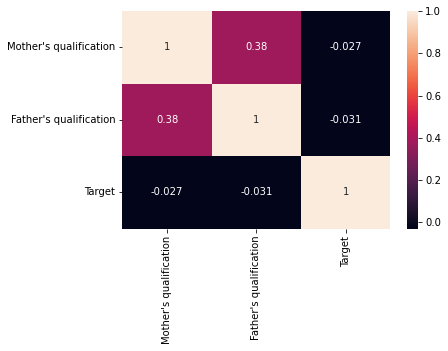

In [341]:
sns.heatmap(filtered_qual.corr(),annot=True)

In [342]:
df['Daytime/evening attendance'].value_counts()

1    3941
0     483
Name: Daytime/evening attendance, dtype: int64

In [124]:
y = df['Target'].copy()
X = df.drop('Target',axis=1).copy()
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [125]:
clf = RandomForestClassifier(criterion='entropy',n_estimators=200)
results = cross_val_score(estimator=clf,X=X,y=y,cv=5,scoring='f1_weighted')
results.mean()

0.7543889499580879

In [126]:
clf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=200)

In [128]:
index = np.where(clf.feature_importances_ == clf.feature_importances_.max()) # 30
most_important_column = df.columns[index[0][0]]
most_important_column

'Curricular units 2nd sem (approved)'

In [130]:
index = np.where(clf.feature_importances_ == clf.feature_importances_.min()) # 14
least_important_column = df.columns[index[0][0]]
least_important_column

'Educational special needs'

In [131]:
y_pred = clf.predict(x_test)
pd.DataFrame(confusion_matrix(y_true=y_test,y_pred=y_pred))

,0,1,2
0,347,29,59
1,66,73,107
2,21,27,599


In [132]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

     Dropout       0.80      0.80      0.80       435
    Enrolled       0.57      0.30      0.39       246
    Graduate       0.78      0.93      0.85       647

    accuracy                           0.77      1328
   macro avg       0.72      0.67      0.68      1328
weighted avg       0.75      0.77      0.75      1328

